In [ ]:
# mentioning it here, as i dont spend any time on it later on: There was no significant difference 
# between using gmms and kmeans for clustering. Largely explained by the data not really being in oval form. 

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import math
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#loading the data set.
df = pd.read_csv(r"H:\\taxi_2017_complete_preprocessed.csv")

In [3]:
# making sure we get to see all columns, and getting rid of certain error messages.
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  # default='warn'

In [4]:
df.head(5)

Unnamed: 0           start_time             end_time  trip_seconds  \
0           0  2017-01-01 00:00:00  2017-01-01 00:30:00        1800.0   
1           1  2017-01-01 00:00:00  2017-01-01 00:00:00         660.0   
2           2  2017-01-01 00:00:00  2017-01-01 00:15:00         120.0   
3           3  2017-01-01 00:00:00  2017-01-01 00:00:00         240.0   
4           4  2017-01-01 00:00:00  2017-01-01 00:00:00         420.0   

   trip_miles  start_census    end_census  start_community  end_community  \
0         0.0  1.703108e+10  1.703108e+10                8              8   
1         2.7           NaN           NaN                2              3   
2         0.5           NaN           NaN               16             16   
3         1.3  1.703184e+10  1.703183e+10               32             28   
4         0.0  1.703128e+10  1.703184e+10               28             32   

    fare  tips  tolls  extras  trip_total payment_type  \
0  13.25  4.25    0.0     1.0       18.50  Credit Card   
1  10.00  2.00    0.0     0.0       12.00  Credit Card   
2   4.50  0.00    0.0     0.0        4.50         Cash   
3   6.25  0.00    0.0     0.0        6.25         Cash   
4   6.00  0.00    0.0     0.0        6.00         Cash   

                             company  start_latitude  start_longitude  \
0          Taxi Affiliation Services       41.893216       -87.637844   
1            Choice Taxi Association       42.001571       -87.695013   
2          Taxi Affiliation Services       41.953582       -87.723452   
3          Taxi Affiliation Services       41.880994       -87.632746   
4  Blue Ribbon Taxi Association Inc.       41.879255       -87.642649   

               Pickup Centroid Location  end_latitude  end_longitude  \
0  POINT (-87.6378442095 41.8932163595)     41.892508     -87.626215   
1   POINT (-87.6950125892 42.001571027)     41.965812     -87.655879   
2  POINT (-87.7234523905 41.9535821253)     41.953582     -87.723452   
3  POINT (-87.6327464887 41.8809944707)     41.885281     -87.657233   
4   POINT (-87.642648998 41.8792550844)     41.880994     -87.632746   

              Dropoff Centroid Location  new_TaxiID  dur_min  \
0  POINT (-87.6262149064 41.8925077809)        2751     30.0   
1    POINT (-87.6558787862 41.96581197)        5058     11.0   
2  POINT (-87.7234523905 41.9535821253)        5047      2.0   
3  POINT (-87.6572331997 41.8852813201)        2416      4.0   
4  POINT (-87.6327464887 41.8809944707)        3952      7.0   

                  date  weekday  avg_temp  precip  hour  day  month  
0  2017-01-01 00:00:00        6      -0.6     0.0     0    1      1  
1  2017-01-01 00:00:00        6      -0.6     0.0     0    1      1  
2  2017-01-01 00:00:00        6      -0.6     0.0     0    1      1  
3  2017-01-01 00:00:00        6      -0.6     0.0     0    1      1  
4  2017-01-01 00:00:00        6      -0.6     0.0     0    1      1

In [5]:
#plotting data for "hour" on a circle. 
df['xh']=(np.sin(2.*np.pi*df.hour/24.) +1 )/2
df['yh']=(np.cos(2.*np.pi*df.hour/24.) +1 )/2

In [6]:
#plotting data for "month" on a circle. 
df['xm']=(np.sin(2.*np.pi*df.month/12.) +1 )/2
df['ym']=(np.cos(2.*np.pi*df.month/12.) +1 )/2

In [7]:
#plotting data for "weekday" on a circle. 
df['xw']=(np.sin(2.*np.pi*df.weekday/7.) +1 )/2
df['yw']=(np.cos(2.*np.pi*df.weekday/7.) +1 )/2

In [8]:
#plotting data for "day" on a circle. 
df['xd']=(np.sin(2.*np.pi*df.day/31.) +1 )/2
df['yd']=(np.cos(2.*np.pi*df.day/31.) +1 )/2

In [9]:
df.head(5)

Unnamed: 0           start_time             end_time  trip_seconds  \
0           0  2017-01-01 00:00:00  2017-01-01 00:30:00        1800.0   
1           1  2017-01-01 00:00:00  2017-01-01 00:00:00         660.0   
2           2  2017-01-01 00:00:00  2017-01-01 00:15:00         120.0   
3           3  2017-01-01 00:00:00  2017-01-01 00:00:00         240.0   
4           4  2017-01-01 00:00:00  2017-01-01 00:00:00         420.0   

   trip_miles  start_census    end_census  start_community  end_community  \
0         0.0  1.703108e+10  1.703108e+10                8              8   
1         2.7           NaN           NaN                2              3   
2         0.5           NaN           NaN               16             16   
3         1.3  1.703184e+10  1.703183e+10               32             28   
4         0.0  1.703128e+10  1.703184e+10               28             32   

    fare  tips  tolls  extras  trip_total payment_type  \
0  13.25  4.25    0.0     1.0       18.50  Credit Card   
1  10.00  2.00    0.0     0.0       12.00  Credit Card   
2   4.50  0.00    0.0     0.0        4.50         Cash   
3   6.25  0.00    0.0     0.0        6.25         Cash   
4   6.00  0.00    0.0     0.0        6.00         Cash   

                             company  start_latitude  start_longitude  \
0          Taxi Affiliation Services       41.893216       -87.637844   
1            Choice Taxi Association       42.001571       -87.695013   
2          Taxi Affiliation Services       41.953582       -87.723452   
3          Taxi Affiliation Services       41.880994       -87.632746   
4  Blue Ribbon Taxi Association Inc.       41.879255       -87.642649   

               Pickup Centroid Location  end_latitude  end_longitude  \
0  POINT (-87.6378442095 41.8932163595)     41.892508     -87.626215   
1   POINT (-87.6950125892 42.001571027)     41.965812     -87.655879   
2  POINT (-87.7234523905 41.9535821253)     41.953582     -87.723452   
3  POINT (-87.6327464887 41.8809944707)     41.885281     -87.657233   
4   POINT (-87.642648998 41.8792550844)     41.880994     -87.632746   

              Dropoff Centroid Location  new_TaxiID  dur_min  \
0  POINT (-87.6262149064 41.8925077809)        2751     30.0   
1    POINT (-87.6558787862 41.96581197)        5058     11.0   
2  POINT (-87.7234523905 41.9535821253)        5047      2.0   
3  POINT (-87.6572331997 41.8852813201)        2416      4.0   
4  POINT (-87.6327464887 41.8809944707)        3952      7.0   

                  date  weekday  avg_temp  precip  hour  day  month   xh   yh  \
0  2017-01-01 00:00:00        6      -0.6     0.0     0    1      1  0.5  1.0   
1  2017-01-01 00:00:00        6      -0.6     0.0     0    1      1  0.5  1.0   
2  2017-01-01 00:00:00        6      -0.6     0.0     0    1      1  0.5  1.0   
3  2017-01-01 00:00:00        6      -0.6     0.0     0    1      1  0.5  1.0   
4  2017-01-01 00:00:00        6      -0.6     0.0     0    1      1  0.5  1.0   

     xm        ym        xw        yw        xd        yd  
0  0.75  0.933013  0.109084  0.811745  0.600649  0.989765  
1  0.75  0.933013  0.109084  0.811745  0.600649  0.989765  
2  0.75  0.933013  0.109084  0.811745  0.600649  0.989765  
3  0.75  0.933013  0.109084  0.811745  0.600649  0.989765  
4  0.75  0.933013  0.109084  0.811745  0.600649  0.989765

In [10]:
# selecting the variables we will use for clustering.
work_data = df.loc[:, ("trip_seconds","trip_miles","fare","tips",
                "tolls","extras","start_latitude"
                ,"end_latitude","start_longitude",
                "end_longitude","dur_min","avg_temp","precip",
                       "trip_total","xh","yh" ,"xm" ,"ym" ,"xw" ,
                       "yw","weekday","hour","month","day","xd","yd")]
work_data

trip_seconds  trip_miles   fare  tips  tolls  extras  \
0               1800.0        0.00  13.25  4.25    0.0     1.0   
1                660.0        2.70  10.00  2.00    0.0     0.0   
2                120.0        0.50   4.50  0.00    0.0     0.0   
3                240.0        1.30   6.25  0.00    0.0     0.0   
4                420.0        0.00   6.00  0.00    0.0     0.0   
...                ...         ...    ...   ...    ...     ...   
21737161         961.0        4.00  13.75  0.00    0.0     0.0   
21737162         644.0        1.01   7.25  0.00    0.0     1.0   
21737163         381.0        1.52   7.25  0.00    0.0     1.5   
21737164        1116.0        5.50  17.25  3.85    0.0     1.5   
21737165         926.0        0.20   8.25  0.00    0.0     0.0   

          start_latitude  end_latitude  start_longitude  end_longitude  \
0              41.893216     41.892508       -87.637844     -87.626215   
1              42.001571     41.965812       -87.695013     -87.655879   
2              41.953582     41.953582       -87.723452     -87.723452   
3              41.880994     41.885281       -87.632746     -87.657233   
4              41.879255     41.880994       -87.642649     -87.632746   
...                  ...           ...              ...            ...   
21737161       41.944227     41.899602       -87.655998     -87.633308   
21737162       41.891972     41.898332       -87.612945     -87.620763   
21737163       41.906026     41.904935       -87.675312     -87.649907   
21737164       41.899602     41.944227       -87.633308     -87.655998   
21737165       41.892508     41.892073       -87.626215     -87.628874   

          dur_min  avg_temp  precip  trip_total       xh        yh    xm  \
0           30.00      -0.6     0.0       18.50  0.50000  1.000000  0.75   
1           11.00      -0.6     0.0       12.00  0.50000  1.000000  0.75   
2            2.00      -0.6     0.0        4.50  0.50000  1.000000  0.75   
3            4.00      -0.6     0.0        6.25  0.50000  1.000000  0.75   
4            7.00      -0.6     0.0        6.00  0.50000  1.000000  0.75   
...           ...       ...     ...         ...      ...       ...   ...   
21737161    16.02     -12.8     0.0       13.75  0.37059  0.982963  0.50   
21737162    10.73     -12.8     0.0        8.25  0.37059  0.982963  0.50   
21737163     6.35     -12.8     0.0        8.75  0.37059  0.982963  0.50   
21737164    18.60     -12.8     0.0       23.10  0.37059  0.982963  0.50   
21737165    15.43     -12.8     0.0        8.25  0.37059  0.982963  0.50   

                ym        xw        yw  weekday  hour  month  day        xd  \
0         0.933013  0.109084  0.811745        6     0      1    1  0.600649   
1         0.933013  0.109084  0.811745        6     0      1    1  0.600649   
2         0.933013  0.109084  0.811745        6     0      1    1  0.600649   
3         0.933013  0.109084  0.811745        6     0      1    1  0.600649   
4         0.933013  0.109084  0.811745        6     0      1    1  0.600649   
...            ...       ...       ...      ...   ...    ...  ...       ...   
21737161  1.000000  0.109084  0.811745        6    23     12   31  0.500000   
21737162  1.000000  0.109084  0.811745        6    23     12   31  0.500000   
21737163  1.000000  0.109084  0.811745        6    23     12   31  0.500000   
21737164  1.000000  0.109084  0.811745        6    23     12   31  0.500000   
21737165  1.000000  0.109084  0.811745        6    23     12   31  0.500000   

                yd  
0         0.989765  
1         0.989765  
2         0.989765  
3         0.989765  
4         0.989765  
...            ...  
21737161  1.000000  
21737162  1.000000  
21737163  1.000000  
21737164  1.000000  
21737165  1.000000  

[21737166 rows x 26 columns]

In [11]:
# fill missing values with the data mean.
work_data = work_data.fillna(work_data.mean())

In [12]:
# we use a sample of 1 000 000 because otherwise my pc does not manage it.
work_data = work_data.sample(10000000,random_state=101)

In [13]:
# the function to plot the clusters for kmeans. By default the first two variables given in any data will be plotted.
def plot_kmeans(k, X, outlier = True, label=True, ax=None):
    # we filter outliers using the zscore. 
    if outlier:
        X = X[(np.abs(stats.zscore(X)) < 3).all(axis=1)]
    X = X.copy()
    # this calls the function that calculates the clusters.
    centers , km = kmeans(k, X)
    
    # we normalize the data before predicting the labels.
    X2 = normalize(X)
    
    # prediction of the label/cluster for our data
    labels = km.predict(X2)
    
    # all of this is plotting of the clusters. We plot a random subsample of 3000 points, because otherwise the plot will
    # get cluttered.
    X2["labels"] = labels
    X["labels"] = labels
    X = X.sample(3000)
    unique, counts = np.unique(labels, return_counts=True)
    print(dict(zip(unique, counts)))
    print(centers)
    X = X.to_numpy()
    
    if label:
        scatter = plt.scatter(x=X[:, 0], y=X[:, 1], c=X[:, -1], s=40, cmap='viridis', zorder=2)
        plt.xlabel(X2.columns[0])
        plt.ylabel(X2.columns[1])
    else:
        plt.scatter(x=X[:, 0], y=X[:, 1], s=40, zorder=2,label=X[:, -1])
        plt.xlabel(X2.columns[0])
        plt.ylabel(X2.columns[1])
    
    plt.legend(*scatter.legend_elements()) 
    plt.show()
    plt.close()

In [14]:
# the function that calculates the kmeans cluster.
def kmeans(k,unnormalized_X):
    X = normalize(unnormalized_X)
    km = KMeans(n_clusters=k, n_init=10).fit(X)
    cluster_center = pd.DataFrame(km.cluster_centers_, columns = list(X.columns.values))
    reverted_cluster_center = revert(unnormalized_X, cluster_center)
    return reverted_cluster_center, km

In [15]:
# min max normalization.
def normalize(X):
    normalized_X=(X-X.min())/(X.max()-X.min())
    return normalized_X

In [16]:
# reverting min max normalization, need for plotting the data.
def revert(unnormalized_X,X):
    reverted_X = X * (unnormalized_X.max()-unnormalized_X.min()) + unnormalized_X.min()
    return reverted_X

In [17]:
# the function that calculates the gmm cluster.
def GMF(k,unnormalized_X):
    X = normalize(unnormalized_X)
    gmm = GaussianMixture(n_components=k).fit(X)
    cluster_center = pd.DataFrame(gmm.means_, columns = list(X.columns.values))
    reverted_cluster_center = revert(unnormalized_X, cluster_center)
    return reverted_cluster_center, gmm

In [18]:
# the function to plot the clusters for gmms. By default the first two variables given in any data will be plotted.
def plot_gmm(k, X, outlier = True, label=True, ax=None):
    # we filter outliers using the zscore.  
    if outlier:
        X = X[(np.abs(stats.zscore(X)) < 3).all(axis=1)]
    X = X.copy()
    
    # this calls the function that calculates the clusters.
    centers , gmm = GMF(k, X)
    
    # we normalize the data before predicting the labels.
    X2 = normalize(X)
    
    # prediction of the label/cluster for our data
    labels = gmm.predict(X2)
    
    # all of this is plotting of the clusters. We plot a random subsample of 3000 points, because otherwise the plot will
    # get cluttered.
    X2["labels"] = labels
    X["labels"] = labels
    X = X.sample(3000)
    unique, counts = np.unique(labels, return_counts=True)
    print(dict(zip(unique, counts)))
    print(centers)
    X = X.to_numpy()
    
    if label:
        scatter = plt.scatter(x=X[:, 0], y=X[:, 1], c=X[:, -1], s=40, cmap='viridis', zorder=2)
        plt.xlabel(X2.columns[0])
        plt.ylabel(X2.columns[1])
    else:
        plt.scatter(x=X[:, 0], y=X[:, 1], s=40, zorder=2,label=X[:, -1])
        plt.xlabel(X2.columns[0])
        plt.ylabel(X2.columns[1])
    
    plt.legend(*scatter.legend_elements()) 
    plt.show()
    plt.close()
    return centers, X2, X

In [19]:
# a second function for plotting, since the other function always, by default, plots the first two variables of the data
# this function can be used to plot any two variables against each other. 
def plot_with_X_labels_index(X_plot, X_label, index1, index2):
    scatter = plt.scatter(x=X_plot[:, index1], y=X_plot[:, index2], c=X_plot[:, -1], s=40, cmap='viridis', zorder=2)
    plt.xlabel(X_label.columns[index1])
    plt.ylabel(X_label.columns[index2])

    
    plt.legend(*scatter.legend_elements()) 

In [21]:
# calculating the difference in mean for the two subdata samples where rain = 1 or rain = 0
# essentially this shows that there is not much of a difference in mean value for all the 
# other variables depending on whether or not it rained. Together with the fact that the distance measure is 
# not perfectly usable for rain(as the distances are always maximal between days where it rained, and where it did not)
# that leads us to the conlcusion that we will not use rain in clustering.
df1 = work_data[work_data['precip'] == 1]
df2 = work_data[work_data['precip'] == 0]
print(df1.mean()-df2.mean(), df1.mean(), df2.mean())

trip_seconds      -9.458444
trip_miles        -0.076084
fare              -0.196637
tips              -0.003978
tolls              0.000252
extras            -0.040681
start_latitude    -0.000652
end_latitude      -0.000890
start_longitude    0.000095
end_longitude      0.000625
dur_min           -0.157644
avg_temp          -5.918882
precip             1.000000
trip_total        -0.241488
xh                 0.014164
yh                -0.033952
xm                 0.118638
ym                 0.135091
xw                 0.016828
yw                -0.007552
weekday           -0.119418
hour              -0.126123
month             -0.753270
day                1.380993
xd                -0.035240
yd                 0.039358
dtype: float64 trip_seconds       789.912509
trip_miles           3.274349
fare                12.696458
tips                 1.515562
tolls                0.000959
extras               0.727108
start_latitude      41.897692
end_latitude        41.898478
start_longitude  

In [ ]:
# The rest of the Notebook is testing clustering on different combinations of variables

{0: 7886201, 1: 1748233}
        fare      tips    extras
0   7.902099  0.820135  0.341181
1  27.579084  2.920426  1.786442


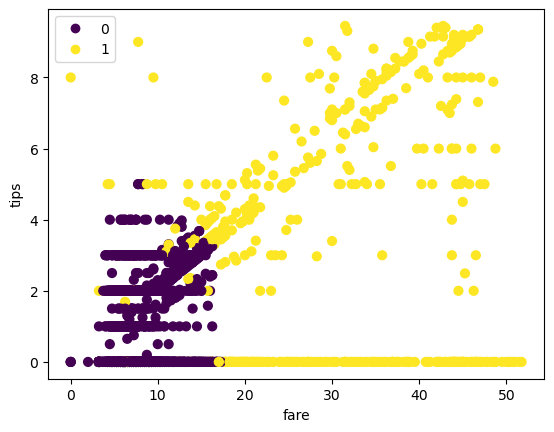

        fare      tips    extras
0   7.902099  0.820135  0.341181
1  27.579084  2.920426  1.786442

{0: 3106907, 1: 877820, 2: 5649707}
        fare      tips    extras
0   8.272968  2.137560  0.315251
1  28.113632  5.567335  1.931921
2  10.720713  0.000014  0.559254


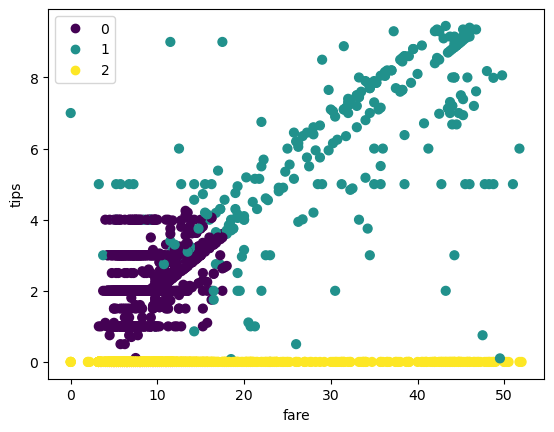

        fare      tips    extras
0   8.272968  2.137560  0.315251
1  28.113632  5.567335  1.931921
2  10.720713  0.000014  0.559254



In [22]:
sub_data_sample = work_data.loc[:,("fare","tips","extras")]
for i in range(2,4):
    centers,X2,X  = plot_gmm(i, sub_data_sample)
    print(centers)
    print()

{0: 8691540, 1: 938290}
   trip_miles       fare      tips
0    1.669739   8.827526  0.879688
1   13.425093  36.736912  4.343894


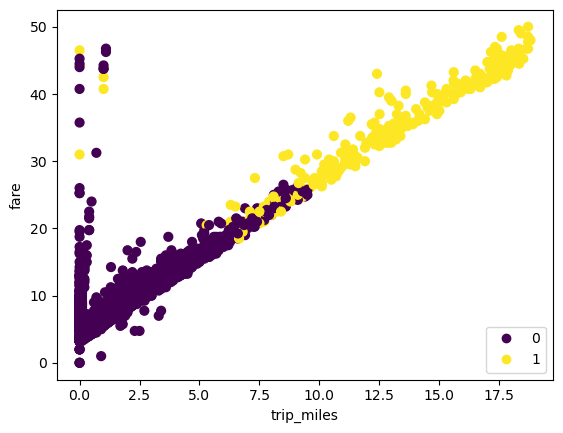

   trip_miles       fare      tips
0    1.669739   8.827526  0.879688
1   13.425093  36.736912  4.343894

{0: 5860274, 1: 852160, 2: 2917396}
   trip_miles       fare      tips
0    1.620244   8.681653  0.089914
1   14.198552  37.891897  4.305820
2    1.888449   9.602701  2.578917


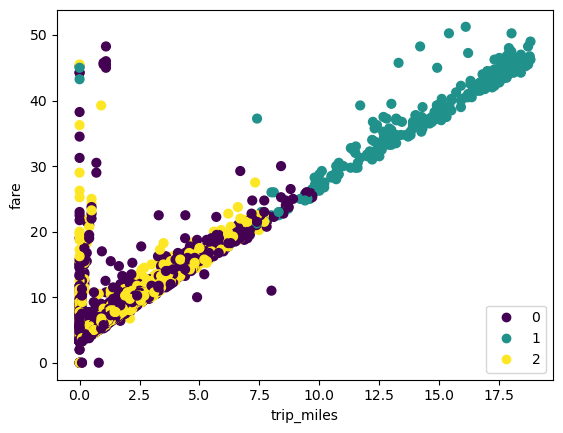

   trip_miles       fare      tips
0    1.620244   8.681653  0.089914
1   14.198552  37.891897  4.305820
2    1.888449   9.602701  2.578917



In [23]:
sub_data_sample = work_data.loc[:,("trip_miles","fare","tips")]
for i in range(2,4):
    centers,X2,X = plot_kmeans(i, sub_data_sample)
    print(centers)
    print()

{0: 7199313, 1: 2430517}
   trip_miles       fare      tips
0    1.408537   7.515796  0.807748
1    6.886620  23.216927  2.402477


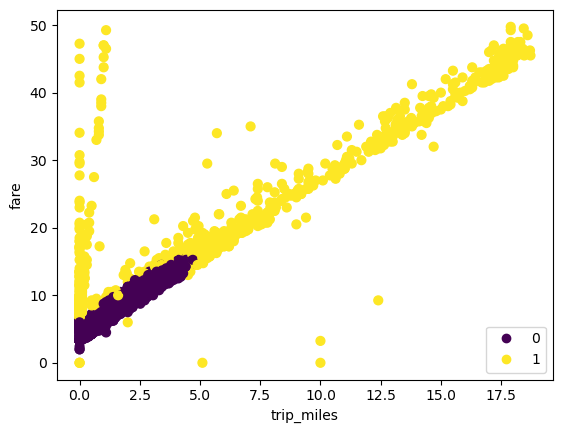

   trip_miles       fare      tips
0    1.408537   7.515796  0.807748
1    6.886620  23.216927  2.402477

{0: 5117292, 1: 1519407, 2: 2993131}
   trip_miles       fare      tips
0    1.695274   8.375014  0.000013
1    8.802298  28.589255  3.434059
2    1.639526   8.174887  2.158147


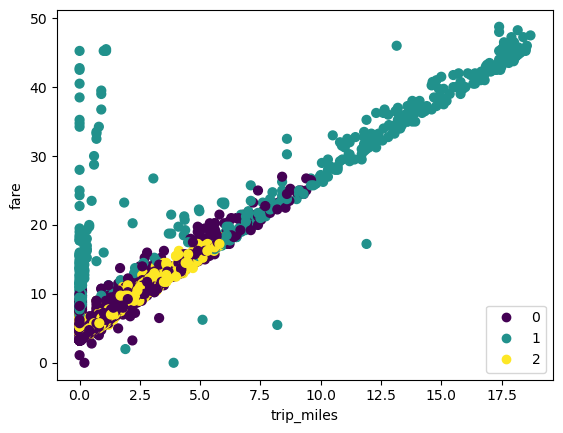

   trip_miles       fare      tips
0    1.695274   8.375014  0.000013
1    8.802298  28.589255  3.434059
2    1.639526   8.174887  2.158147



In [24]:
sub_data_sample = work_data.loc[:,("trip_miles","fare","tips")]
for i in range(2,4):
    centers,X2,X  = plot_gmm(i, sub_data_sample)
    print(centers)
    print()

{0: 6915763, 1: 1910962}
   start_longitude  start_latitude  end_latitude  end_longitude  trip_total  \
0       -87.631613       41.887151     41.886776     -87.633151    9.291656   
1       -87.657744       41.923642     41.931845     -87.673583   17.232117   

   trip_miles  
0    1.321989  
1    4.345052  


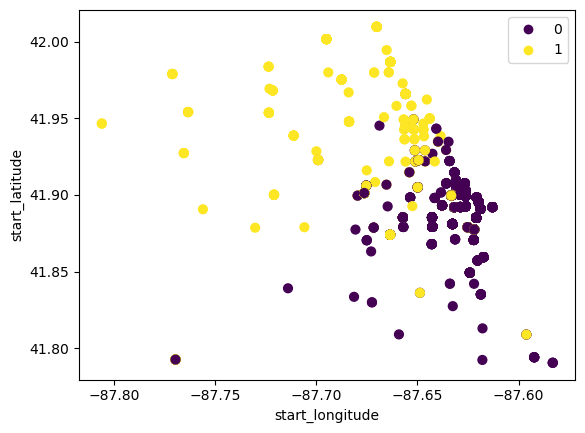

   start_longitude  start_latitude  end_latitude  end_longitude  trip_total  \
0       -87.631613       41.887151     41.886776     -87.633151    9.291656   
1       -87.657744       41.923642     41.931845     -87.673583   17.232117   

   trip_miles  
0    1.321989  
1    4.345052  



In [26]:
sub_data_sample = work_data.loc[:,("start_longitude","start_latitude","end_latitude","end_longitude","trip_total","trip_miles")]
for i in range(2,3):
    centers,X2,X  = plot_kmeans(i, sub_data_sample)
    print(centers)
    print()

{0: 8736685, 1: 897749}
        fare      tips    extras
0   9.008792  0.868262  0.397526
1  37.282845  4.637948  2.742085


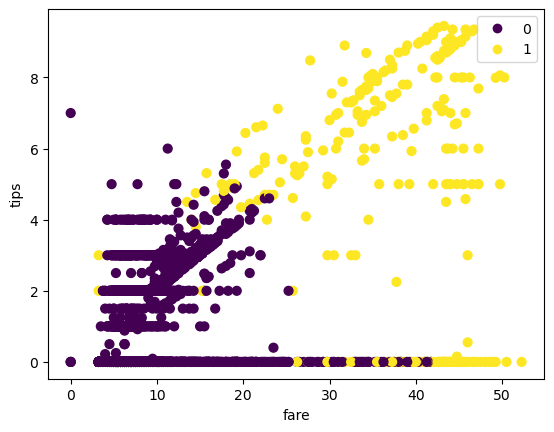


{0: 5928473, 1: 790447, 2: 2915514}
        fare      tips    extras
0   9.024141  0.088898  0.405967
1  38.825170  4.731576  3.015969
2   9.594196  2.565624  0.391916


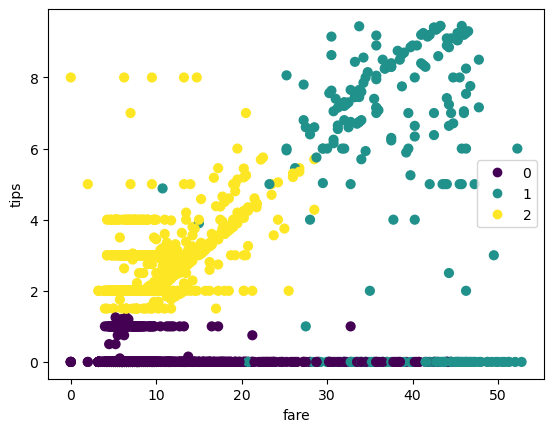

In [27]:
sub_data_sample = work_data.loc[:,("fare","tips","extras")]
for i in range(2,4):
    centers,X2,X = plot_kmeans(i, sub_data_sample)
    print()

{0: 5581331, 1: 3245394}
   start_longitude  start_latitude  end_latitude  end_longitude  trip_total  \
0       -87.629601       41.887831     41.888163     -87.630876    8.260925   
1       -87.650336       41.907347     41.910789     -87.660690   15.695572   

   trip_miles  
0    1.047580  
1    3.558924  


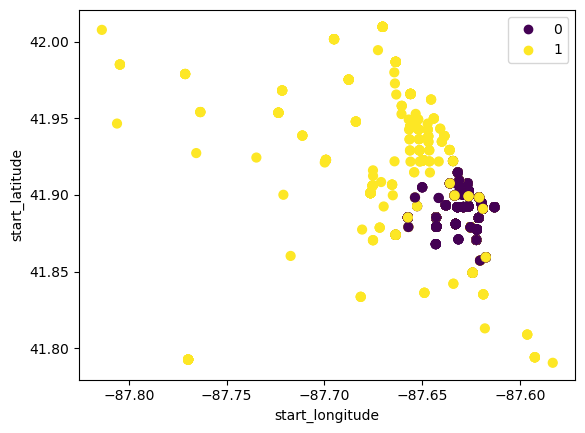


{0: 3124456, 1: 759254, 2: 4943015}
   start_longitude  start_latitude  end_latitude  end_longitude  trip_total  \
0       -87.641607       41.902805     41.909588     -87.649031   12.400766   
1       -87.669135       41.907380     41.893936     -87.684691   24.304905   
2       -87.629308       41.887982     41.888383     -87.630356    7.964010   

   trip_miles  
0    2.614823  
1    5.757346  
2    0.950502  


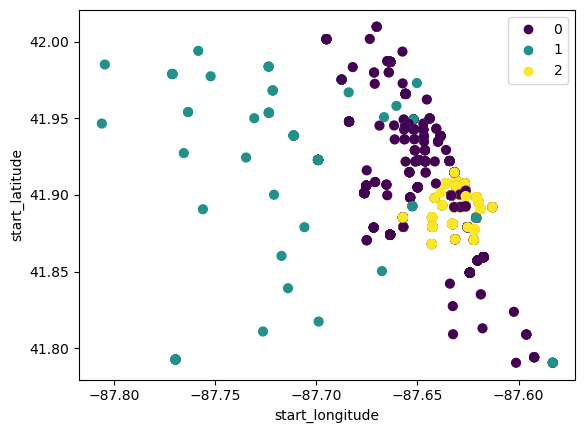

In [28]:
sub_data_sample = work_data.loc[:,("start_longitude","start_latitude","end_latitude","end_longitude","trip_total","trip_miles")]
for i in range(2,4):
    centers,X2,X  = plot_gmm(i, sub_data_sample)
    print()

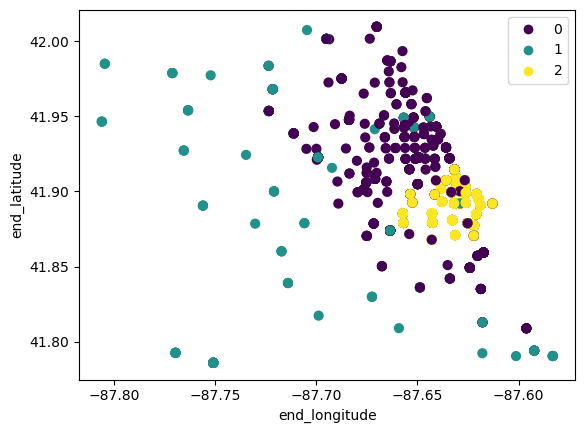

In [29]:
plot_with_X_labels_index(X,X2,3,2)

{0: 4765482, 1: 5078384}
     dur_min   avg_temp
0  11.316670   2.562866
1  13.263916  21.013890


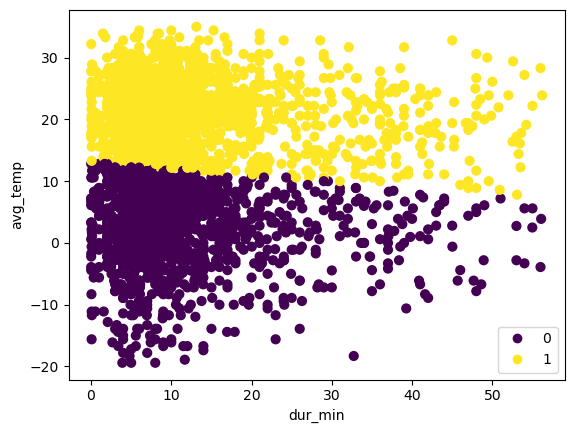


{0: 4494814, 1: 1184062, 2: 4164990}
     dur_min   avg_temp
0   9.317568  20.969036
1  34.717022  13.397248
2   9.179319   2.095081


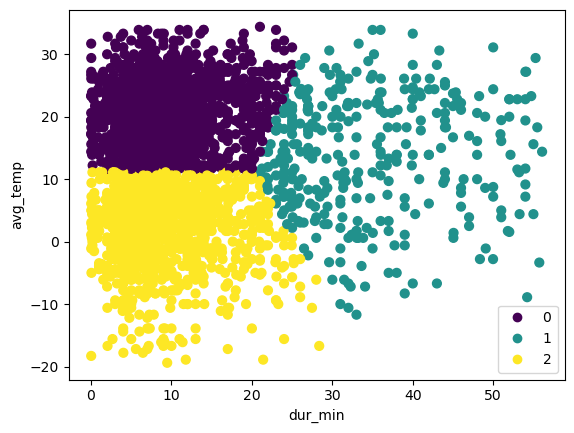

In [31]:
sub_data_sample = work_data.loc[:,("dur_min","avg_temp")]
for i in range(2,4):
    centers,X2,X  = plot_kmeans(i, sub_data_sample)
    print()

{0: 7702179, 1: 2141687}
     dur_min   avg_temp
0   7.905605  11.659908
1  23.768062  13.139708


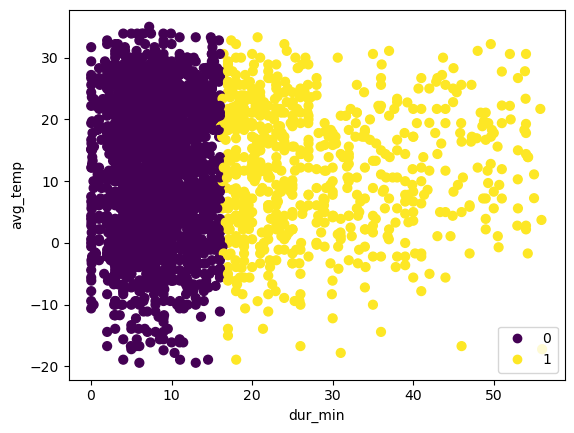


{0: 3627116, 1: 4328863, 2: 1887887}
     dur_min   avg_temp
0   8.757895  21.982675
1   7.891963   4.413552
2  26.534769  11.374772


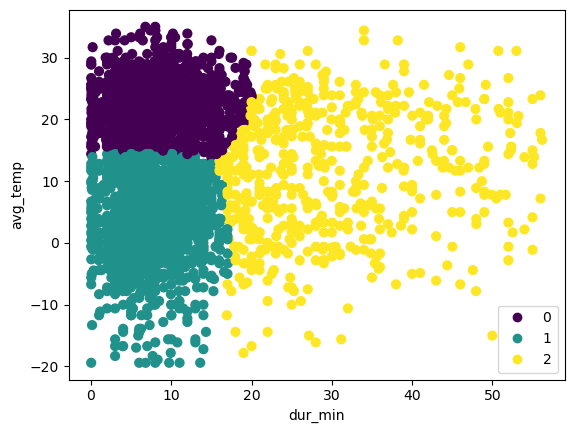

In [32]:
sub_data_sample = work_data.loc[:,("dur_min","avg_temp")]
for i in range(2,4):
    centers,X2,X  = plot_gmm(i, sub_data_sample)
    print()

{0: 4526193, 1: 4281289}
   trip_total  trip_miles  start_latitude  end_latitude  start_longitude  \
0   11.478058    2.119023       41.895118     41.896875       -87.637177   
1   10.401678    1.797487       41.894953     41.896196       -87.637300   

   end_longitude    dur_min   avg_temp  
0     -87.642466  10.739262  21.079997  
1     -87.641144   9.514348   2.526500  


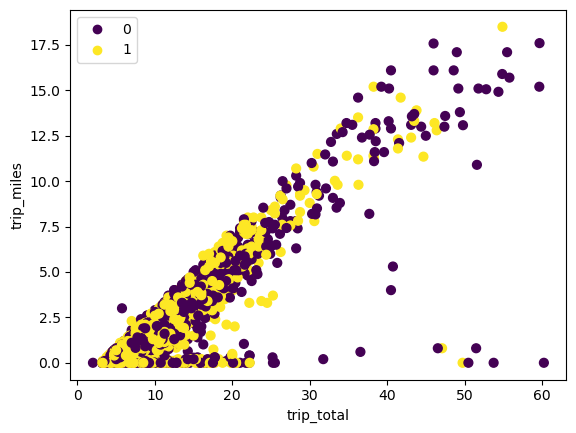


{0: 3813338, 1: 3552272, 2: 1441872}
   trip_total  trip_miles  start_latitude  end_latitude  start_longitude  \
0    9.355317    1.356274       41.889791     41.889956       -87.632554   
1    9.086199    1.307156       41.890370     41.890420       -87.633506   
2   19.801556    5.186574       41.920460     41.929116       -87.658853   

   end_longitude    dur_min   avg_temp  
0     -87.634329   8.752998  21.033751  
1     -87.635056   8.375141   2.060607  
2     -87.678376  18.190604  12.918384  


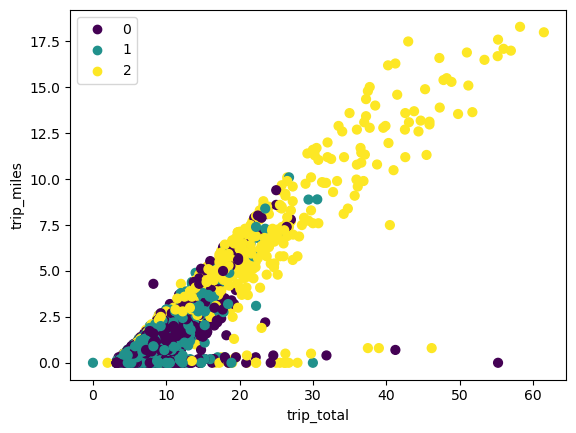

In [33]:
sub_data_sample = work_data.loc[:,("trip_total","trip_miles","start_latitude"
                ,"end_latitude","start_longitude",
                "end_longitude","dur_min","avg_temp")]
for i in range(2,4):
    centers,X2,X  = plot_kmeans(i, sub_data_sample)
    print()

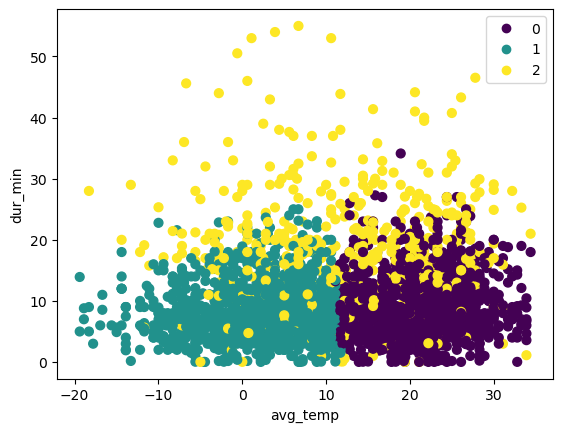

In [34]:
plot_with_X_labels_index(X, X2, 7,6)

{0: 5547601, 1: 3259881}
   trip_total  trip_miles  start_latitude  end_latitude  start_longitude  \
0    8.213853    1.050604       41.887801     41.888183       -87.629665   
1   15.597669    3.507776       41.907299     41.910711       -87.650067   

   end_longitude    dur_min   avg_temp  
0     -87.630945   7.620509  11.823857  
1     -87.660253  14.417709  12.440702  


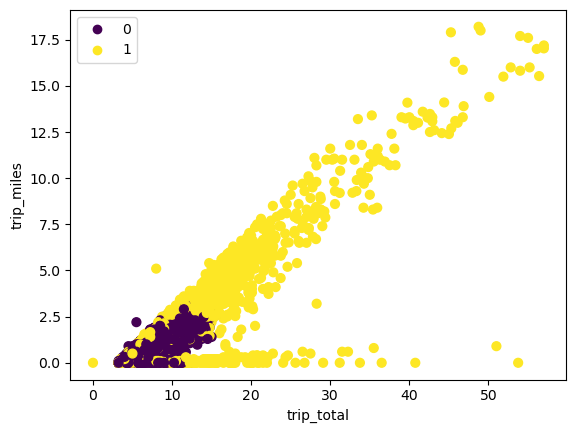


{0: 2734713, 1: 4767503, 2: 1305266}
   trip_total  trip_miles  start_latitude  end_latitude  start_longitude  \
0   12.062741    2.385805       41.901810     41.907678       -87.634893   
1    7.799450    0.950329       41.887674     41.888326       -87.630223   
2   19.503373    4.565931       41.906350     41.901784       -87.666175   

   end_longitude    dur_min   avg_temp  
0     -87.645305  11.772443  12.644853  
1     -87.630436   7.022250  11.657674  
2     -87.673745  17.500382  12.187379  


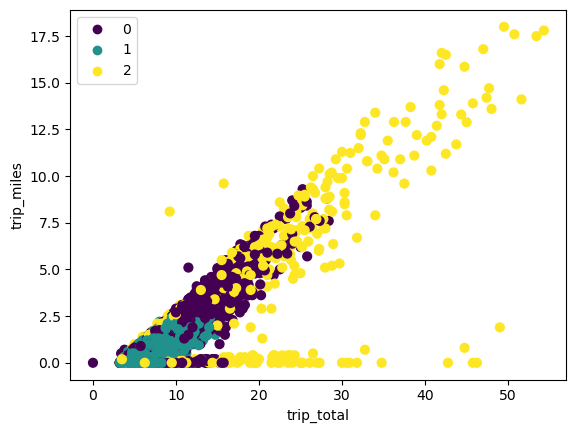

In [35]:
sub_data_sample = work_data.loc[:,("trip_total","trip_miles","start_latitude"
                ,"end_latitude","start_longitude",
                "end_longitude","dur_min","avg_temp")]
for i in range(2,4):
    centers,X2,X  = plot_gmm(i, sub_data_sample)
    print()

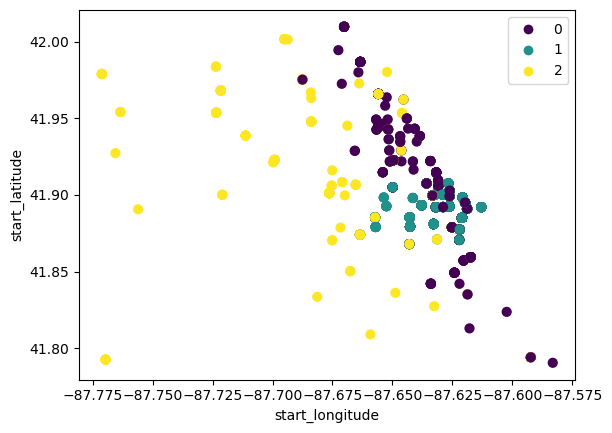

In [36]:
plot_with_X_labels_index(X,X2,4,2)

{0: 4324933, 1: 4519446}
   start_longitude  start_latitude  end_longitude  end_latitude   avg_temp
0       -87.637683       41.895012     -87.642011     41.896306   2.551435
1       -87.637043       41.895034     -87.641937     41.896792  21.151302


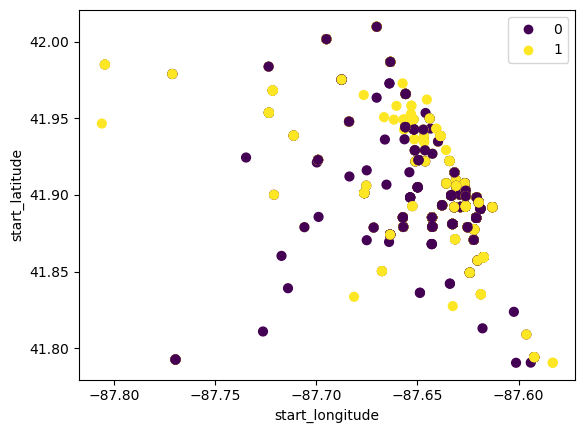

In [37]:
sub_data_sample = work_data.loc[:,("start_longitude","start_latitude","end_longitude","end_latitude","avg_temp")]
for i in range(2,3):
    centers,X2,X  = plot_kmeans(i, sub_data_sample)
    print()

{0: 5866580, 1: 2977799}
   start_longitude  start_latitude  end_longitude  end_latitude   avg_temp
0       -87.629236       41.887977     -87.630789     41.888385  11.854561
1       -87.652619       41.908266     -87.662993     41.911908  12.429873


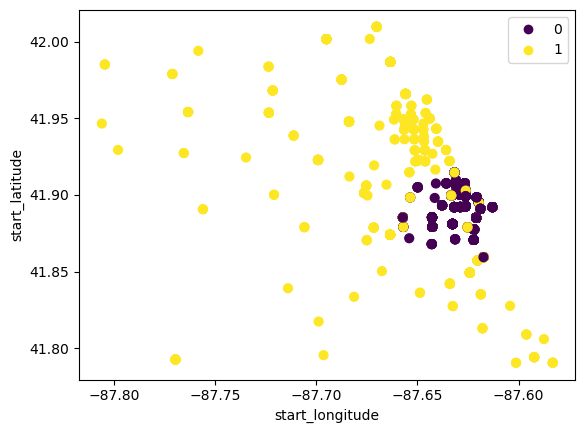

In [38]:
sub_data_sample = work_data.loc[:,("start_longitude","start_latitude","end_longitude","end_latitude","avg_temp")]
for i in range(2,3):
    centers,X2,X = plot_gmm(i, sub_data_sample)
    print()

{0: 4272984, 1: 4534498}
   start_longitude  start_latitude  end_latitude  trip_total  trip_miles  \
0       -87.637312       41.895009     41.896270   10.375104    1.788864   
1       -87.637167       41.895065     41.896803   11.499155    2.125969   

   end_longitude    dur_min   avg_temp  
0     -87.641120   9.488551   2.494446  
1     -87.642483  10.759092  21.042977  


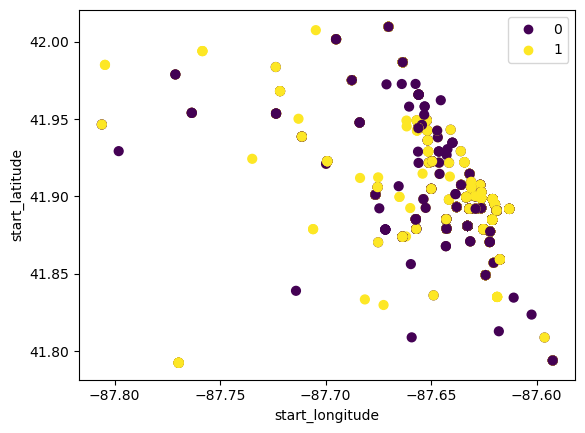


{0: 1441762, 1: 3552278, 2: 3813442}
   start_longitude  start_latitude  end_latitude  trip_total  trip_miles  \
0       -87.658852       41.920455     41.929112   19.803199    5.187131   
1       -87.633508       41.890372     41.890423    9.086354    1.307203   
2       -87.632554       41.889792     41.889957    9.355013    1.356188   

   end_longitude    dur_min   avg_temp  
0     -87.678377  18.192305  12.919356  
1     -87.635058   8.375311   2.060220  
2     -87.634329   8.752612  21.033368  


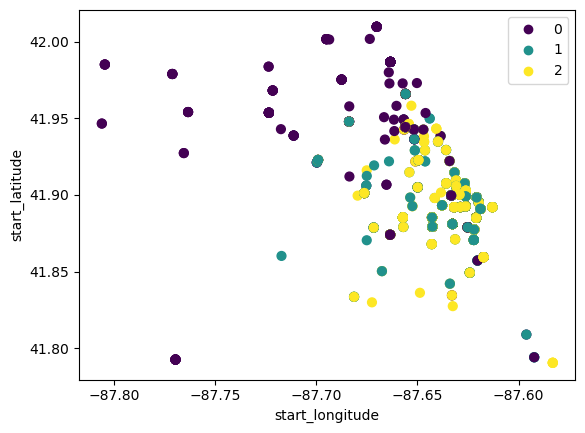

In [39]:
sub_data_sample = work_data.loc[:,("start_longitude","start_latitude"
                ,"end_latitude","trip_total","trip_miles",
                "end_longitude","dur_min","avg_temp")]
for i in range(2,4):
    centers,X2,X  = plot_kmeans(i, sub_data_sample)
    print()

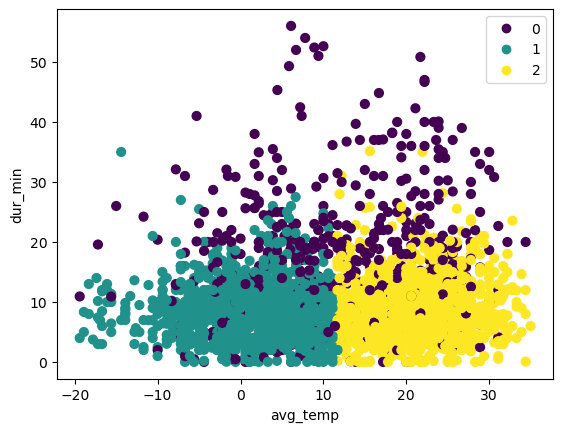

In [40]:
plot_with_X_labels_index(X,X2,7,6)

{0: 3257110, 1: 5550372}
   start_longitude  start_latitude  end_latitude  trip_total  trip_miles  \
0       -87.650090       41.907324     41.910733   15.602930    3.509521   
1       -87.629666       41.887800     41.888186    8.215851    1.051272   

   end_longitude    dur_min   avg_temp  
0     -87.660278  14.421603  12.440291  
1     -87.630951   7.622908  11.824525  


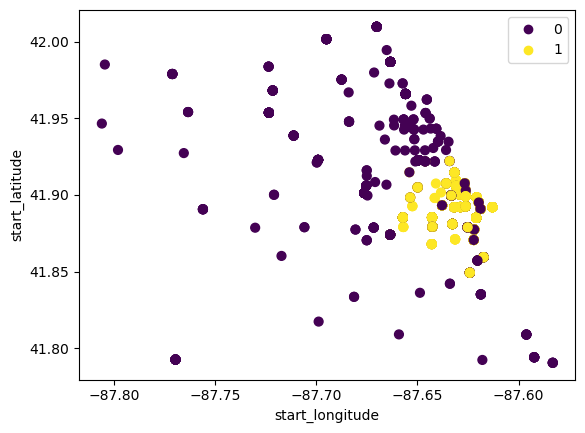


{0: 4759115, 1: 1311600, 2: 2736767}
   start_longitude  start_latitude  end_latitude  trip_total  trip_miles  \
0       -87.630224       41.887670     41.888325    7.793964    0.949821   
1       -87.666091       41.906395     41.901937   19.499631    4.569516   
2       -87.634851       41.901730     41.907541   12.042011    2.374901   

   end_longitude    dur_min   avg_temp  
0     -87.630428   7.012958  11.655899  
1     -87.673711  17.492687  12.189162  
2     -87.645221  11.761389  12.643915  


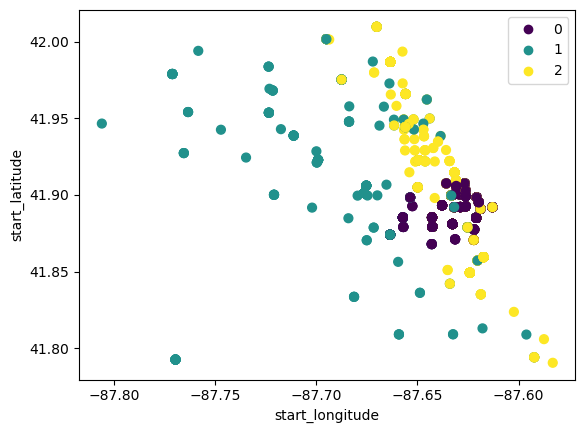


{0: 2123538, 1: 3826851, 2: 2042280, 3: 814813}
   start_longitude  start_latitude  end_latitude  trip_total  trip_miles  \
0       -87.648870       41.909024     41.920881   11.951332    2.727668   
1       -87.629931       41.887507     41.888832    7.343023    0.885974   
2       -87.627789       41.888822     41.886077   10.859155    1.503471   
3       -87.662091       41.906706     41.892593   24.259265    5.779903   

   end_longitude    dur_min   avg_temp  
0     -87.654332  10.559331  12.439397  
1     -87.629200   6.327901  11.490710  
2     -87.636719  11.638668  12.517003  
3     -87.676668  21.896301  12.330922  


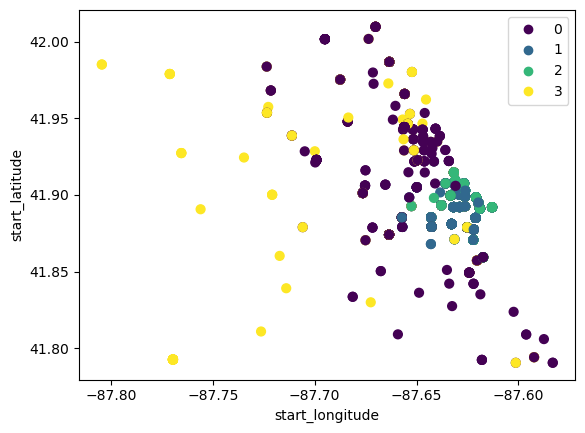


{0: 1322583, 1: 833184, 2: 1463085, 3: 1602727, 4: 3585903}
   start_longitude  start_latitude  end_latitude  trip_total  trip_miles  \
0       -87.627750       41.884938     41.912901   14.196904    3.238917   
1       -87.660913       41.901564     41.895728   23.653625    5.457800   
2       -87.657059       41.923275     41.912602    9.837759    2.013472   
3       -87.631650       41.888178     41.885484   10.553821    1.337874   
4       -87.628924       41.888105     41.888348    7.180526    0.856587   

   end_longitude    dur_min   avg_temp  
0     -87.652513  13.556490  12.968209  
1     -87.676808  21.376871  12.280507  
2     -87.653422   8.658690  12.147885  
3     -87.627808  11.391031  12.371749  
4     -87.630336   6.045992  11.437057  


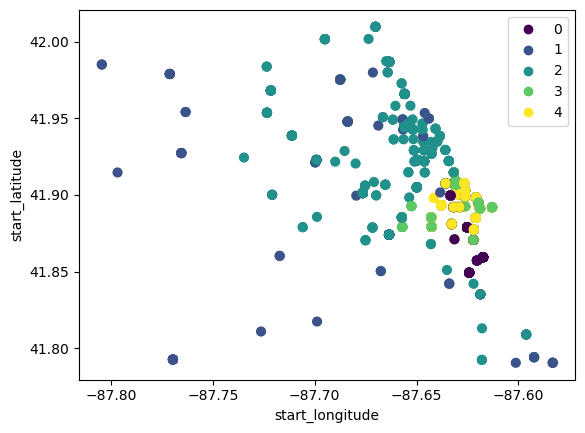

In [41]:
sub_data_sample = work_data.loc[:,("start_longitude","start_latitude"
                ,"end_latitude","trip_total","trip_miles",
                "end_longitude","dur_min","avg_temp")]
for i in range(2,6):
    centers,X2,X  = plot_gmm(i, sub_data_sample)
    print()

In [42]:
# calculating the correlation between all of the variables(for which a correlation makes sense)
# together with the results we get when using "avg_temp" this shows that the variable does 
# not hold much interesting value in this data set. I am aware that clustering does not necessarily require 
# the variables to correlate. 
sub_data = work_data.loc[:,("trip_total","trip_miles","fare","tips",
                "tolls","extras","dur_min","avg_temp")]
work_datacorr=sub_data.corr()
work_datacorr = work_datacorr.round(2)
print(work_datacorr)

            trip_total  trip_miles  fare  tips  tolls  extras  dur_min  \
trip_total        1.00        0.82  0.98  0.65   0.06    0.45     0.70   
trip_miles        0.82        1.00  0.81  0.54   0.01    0.34     0.65   
fare              0.98        0.81  1.00  0.52   0.04    0.32     0.70   
tips              0.65        0.54  0.52  1.00   0.00    0.28     0.43   
tolls             0.06        0.01  0.04  0.00   1.00    0.00     0.01   
extras            0.45        0.34  0.32  0.28   0.00    1.00     0.26   
dur_min           0.70        0.65  0.70  0.43   0.01    0.26     1.00   
avg_temp          0.03        0.02  0.02  0.02   0.00    0.03     0.05   

            avg_temp  
trip_total      0.03  
trip_miles      0.02  
fare            0.02  
tips            0.02  
tolls           0.00  
extras          0.03  
dur_min         0.05  
avg_temp        1.00  


In [43]:
# another function for plotting, as it does not make sense to use the time data that we projected
# on a circle when we plot the data. This function uses the original time variable e.g. "day" for plotting.
def plot_with_X_labels_index2(original_sample,X_plot, X_label, index1, index2):
    X_label = revert(X_label, X_label)
    test = X_label["labels"]
    original_sample["labels"] = test
    X_label = original_sample.copy().sample(3000)
    X_plot = X_label.to_numpy()
    scatter = plt.scatter(x=X_plot[:, index1], y=X_plot[:, index2], c=X_plot[:, -1], s=40, cmap='viridis', zorder=2)
    plt.xlabel(X_label.columns[index1])
    plt.ylabel(X_label.columns[index2])

    plt.legend(*scatter.legend_elements())

In [ ]:
# the following uses the temporal data in clustering, as i, by default, always plot the first two variables of the
# sub-dataset it sometimes plots one of the x or y coordinates we used for projecting the data on the circle.
# These plots do not hold any value and can be ignored.
# That being that, most of what we tested here didnt yield and interesting results.

{0: 5207045, 1: 4682212}
        fare  trip_miles        xm        ym
0  12.437813    3.152148  0.729332  0.262028
1  12.295621    3.127352  0.263410  0.717679


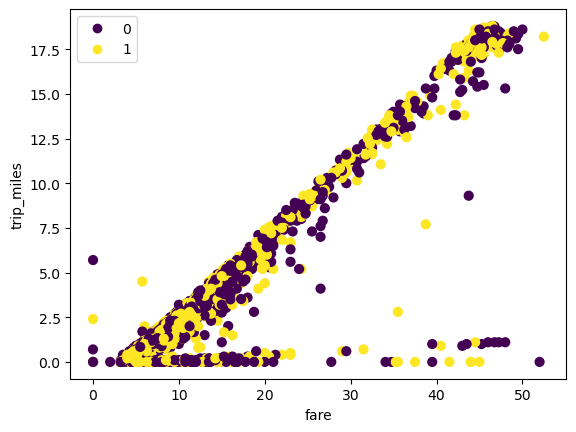


{0: 3081482, 1: 3478936, 2: 3328839}
        fare  trip_miles        xm        ym
0  12.368864    3.152075  0.194274  0.789451
1  12.668629    3.228599  0.403900  0.092861
2  12.060413    3.037439  0.909390  0.591490


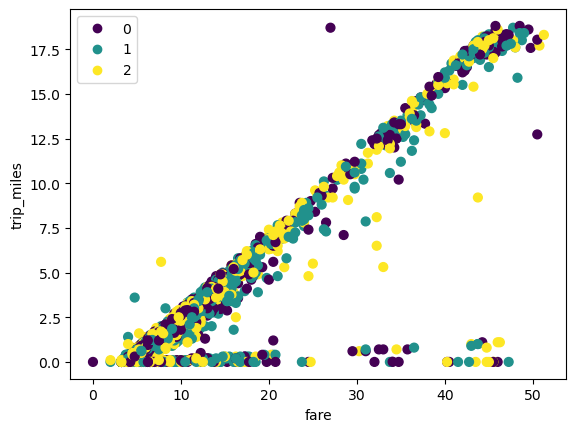


{0: 3117203, 1: 2769575, 2: 982896, 3: 3019583}
        fare  trip_miles        xm        ym
0   9.447013    1.802600  0.402757  0.092903
1   9.208576    1.745990  0.197266  0.792062
2  40.270229   15.547716  0.491907  0.458317
3   9.206249    1.761413  0.909298  0.593110


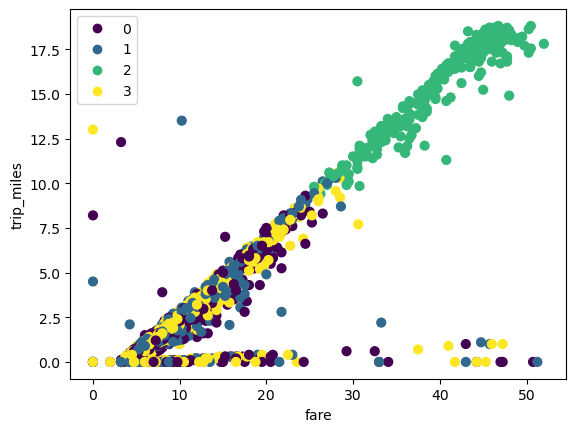


{0: 2038623, 1: 2377863, 2: 2319056, 3: 966836, 4: 2186879}
        fare  trip_miles        xm        ym
0   9.104085    1.726539  0.503408  0.954552
1   9.493872    1.812760  0.508111  0.043818
2   9.281435    1.784426  0.957630  0.489579
3  40.485184   15.642406  0.491694  0.458421
4   9.393222    1.814454  0.045929  0.501105


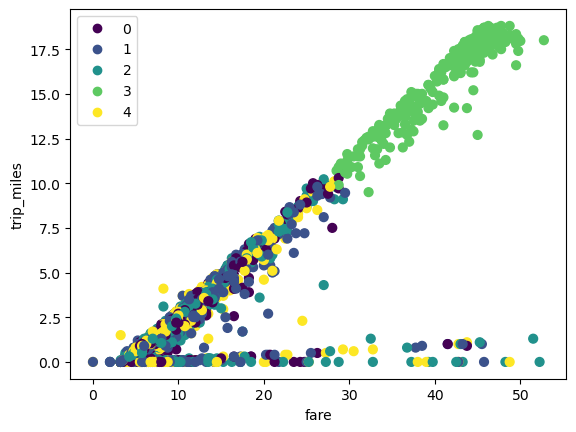

In [44]:
sub_data_sample1 = work_data.loc[:,("fare","trip_miles","xm","ym","month")]
sub_data_sample1 = sub_data_sample1[(np.abs(stats.zscore(sub_data_sample1)) < 3).all(axis=1)]
sub_data_sample = sub_data_sample1.loc[:,("fare","trip_miles","xm","ym")]
for i in range(2,6):
    centers,X2,X  = plot_kmeans(i, sub_data_sample, outlier=False)
    print()

{0: 5217177, 1: 4672080}
        fare        xm        ym  trip_miles
0  12.456762  0.728854  0.262524    3.150924
1  12.275259  0.265755  0.715354    3.128800


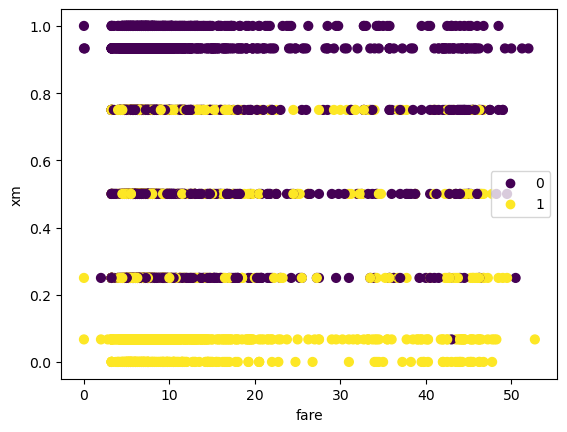


{0: 6236145, 1: 561012, 2: 3092100}
        fare        xm        ym  trip_miles
0   6.974014  0.509607  0.483495    1.239457
1  15.859765  0.513437  0.471942    0.735638
2  22.039998  0.505924  0.467990    7.407446


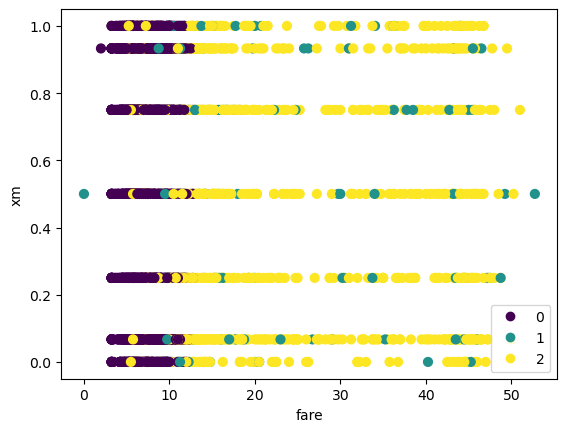

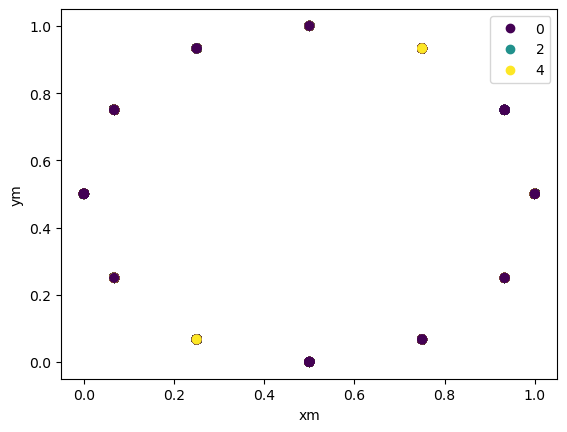

In [46]:
sub_data_sample1 = work_data.loc[:,("fare","xm","ym","month","trip_miles")]
sub_data_sample1 = sub_data_sample1[(np.abs(stats.zscore(sub_data_sample1)) < 3).all(axis=1)]
sub_data_sample = sub_data_sample1.loc[:,("fare","xm","ym","trip_miles")]
for i in range(2,4):
    centers,X2,X  = plot_gmm(i, sub_data_sample, outlier=False)
    print()
plot_with_X_labels_index2(sub_data_sample1,X,X2,1,2)

{0: 5073432, 1: 4872441}
        fare        xd        yd
0  12.605629  0.194723  0.432604
1  12.543958  0.837673  0.527815


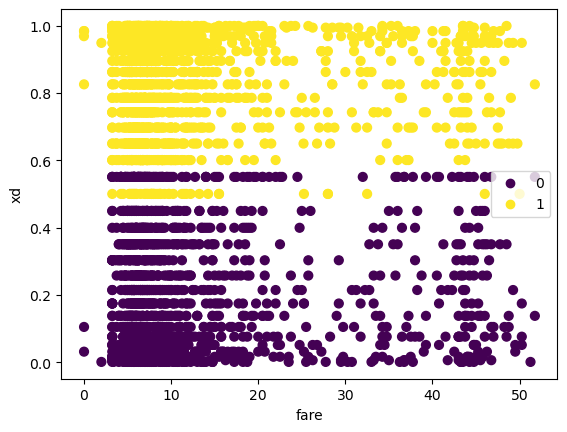


{0: 3368876, 1: 3691666, 2: 2885331}
        fare        xd        yd
0  12.598548  0.416288  0.089137
1  12.548143  0.879744  0.633787
2  12.583304  0.145314  0.737009


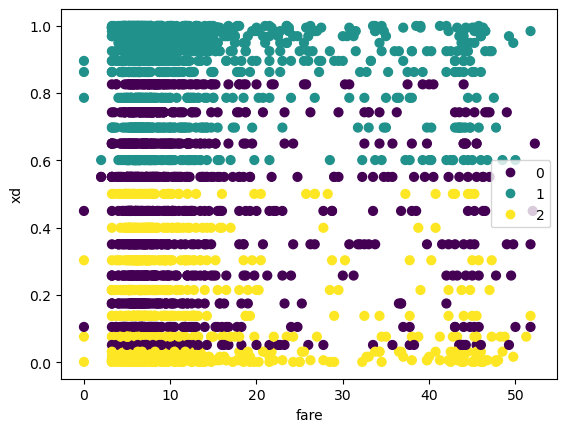

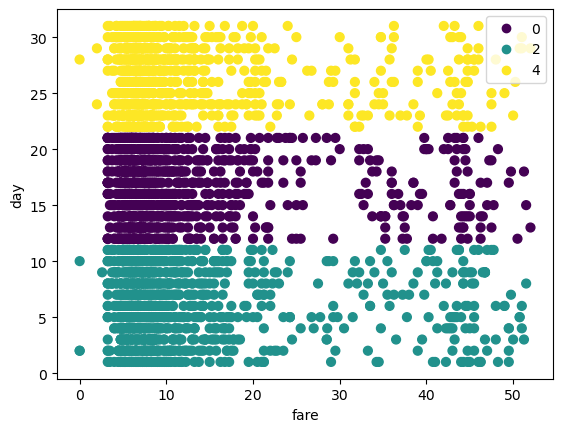

In [47]:
sub_data_sample1 = work_data.loc[:,("fare","xd","yd","day")]
sub_data_sample1 = sub_data_sample1[(np.abs(stats.zscore(sub_data_sample1)) < 3).all(axis=1)]
sub_data_sample = sub_data_sample1.loc[:,("fare","xd","yd")]
for i in range(2,4):
    centers,X2,X  = plot_kmeans(i, sub_data_sample, outlier=False)
    print()
plot_with_X_labels_index2(sub_data_sample1,X,X2,0,3)

{0: 5269479, 1: 4676394}
        fare        xd        yd
0  12.652237  0.334655  0.239508
1  12.489881  0.704607  0.746187


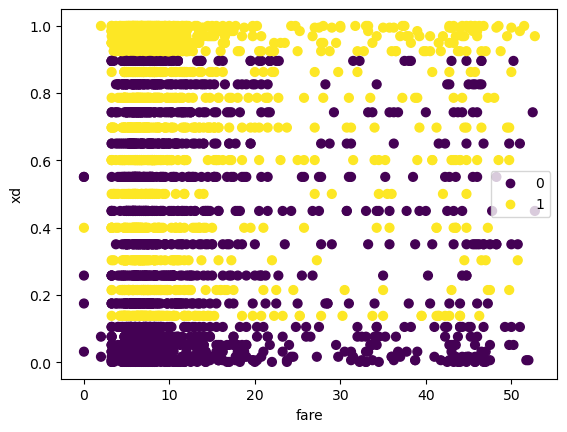


{0: 2885331, 1: 3720371, 2: 3340171}
        fare        xd        yd
0  12.594057  0.139554  0.729849
1  12.568318  0.462985  0.098913
2  12.567439  0.872904  0.682885


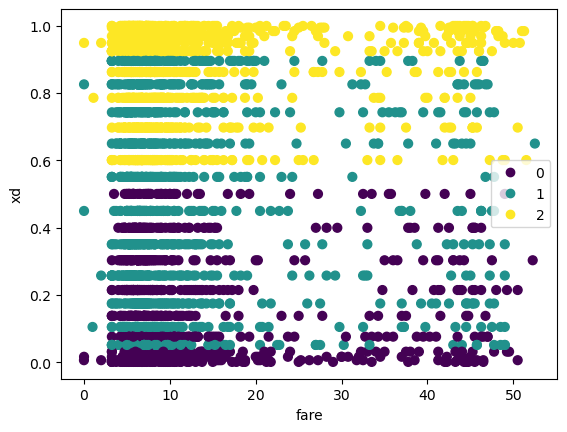

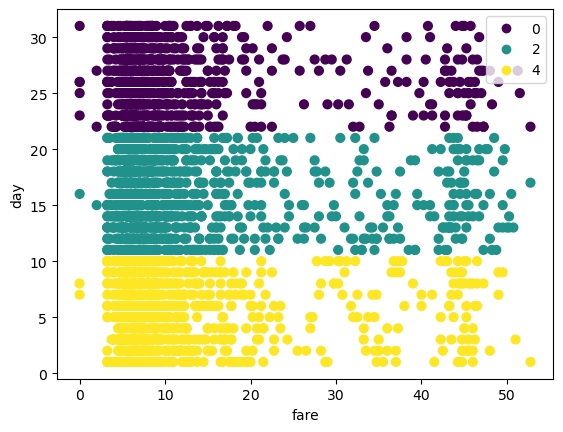

In [48]:
sub_data_sample1 = work_data.loc[:,("fare","xd","yd","day")]
sub_data_sample1 = sub_data_sample1[(np.abs(stats.zscore(sub_data_sample1)) < 3).all(axis=1)]
sub_data_sample = sub_data_sample1.loc[:,("fare","xd","yd")]
for i in range(2,4):
    centers,X2,X  = plot_gmm(i, sub_data_sample, outlier=False)
    print()
plot_with_X_labels_index2(sub_data_sample1,X,X2,0,3)

{0: 5303488, 1: 4585769}
        fare        xw        yw  trip_miles
0  12.696004  0.664855  0.734429    3.291738
1  11.994030  0.357169  0.147894    2.965392


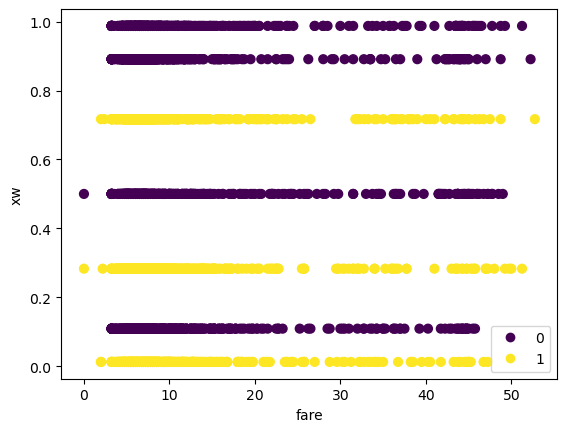


{0: 3773407, 1: 2973287, 2: 3142563}
        fare        xw        yw  trip_miles
0  12.786029  0.534040  0.874602    3.346068
1  11.698335  0.162056  0.201247    2.855886
2  12.507484  0.848656  0.214680    3.162660


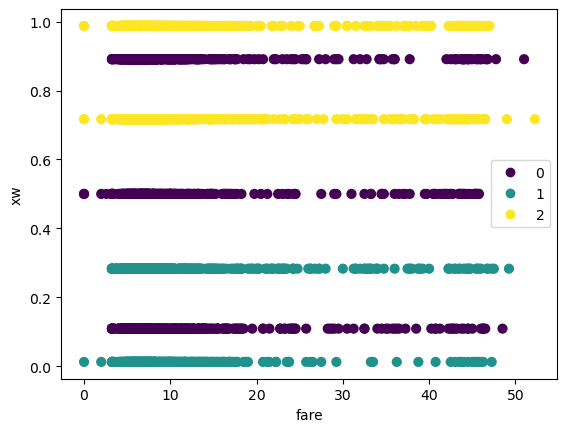

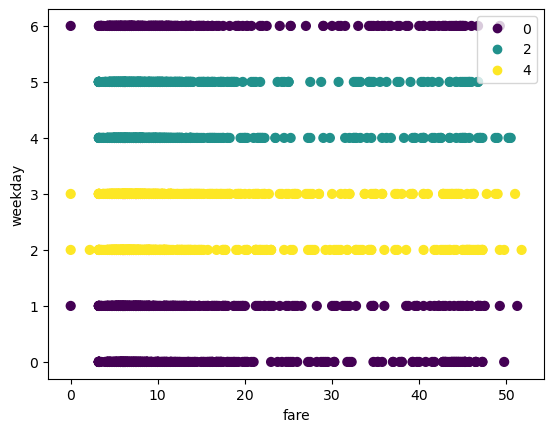

In [49]:
sub_data_sample1 = work_data.loc[:,("fare","xw","yw","weekday","trip_miles")]
sub_data_sample1 = sub_data_sample1[(np.abs(stats.zscore(sub_data_sample1)) < 3).all(axis=1)]
sub_data_sample = sub_data_sample1.loc[:,("fare","xw","yw","trip_miles")]
for i in range(2,4):
    centers,X2,X  = plot_kmeans(i, sub_data_sample, outlier=False)
    print()
plot_with_X_labels_index2(sub_data_sample1,X,X2,0,3)

{0: 3712379, 1: 6176878}
        fare        xw        yw  trip_miles
0  11.504136  0.146447  0.365810    3.135949
1  12.886626  0.746021  0.520017    3.143064


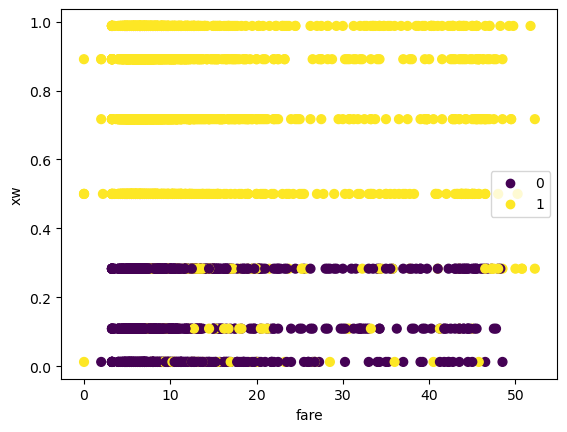


{0: 2352376, 1: 4585769, 2: 2951112}
        fare        xw        yw  trip_miles
0  13.069429  0.318457  0.912574    3.481518
1  11.994030  0.357169  0.147894    2.965392
2  12.398342  0.940974  0.592427    3.140462


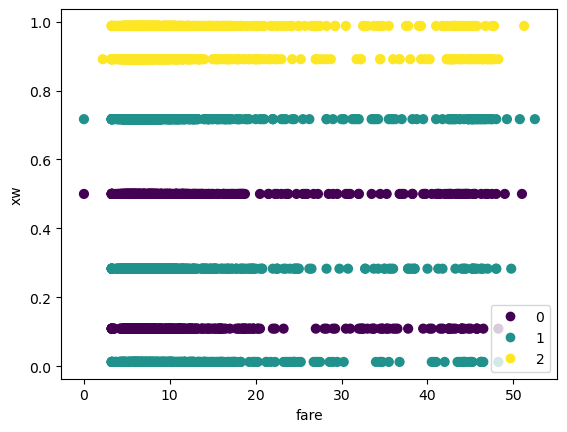

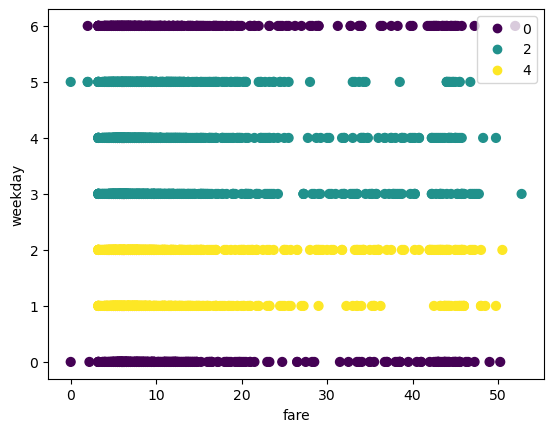

In [50]:
sub_data_sample1 = work_data.loc[:,("fare","xw","yw","weekday","trip_miles")]
sub_data_sample1 = sub_data_sample1[(np.abs(stats.zscore(sub_data_sample1)) < 3).all(axis=1)]
sub_data_sample = sub_data_sample1.loc[:,("fare","xw","yw","trip_miles")]
for i in range(2,4):
    centers,X2,X  = plot_gmm(i, sub_data_sample, outlier=False)
    print()
plot_with_X_labels_index2(sub_data_sample1,X,X2,0,3)

{0: 4288094, 1: 4519388}
   trip_miles   avg_temp  start_latitude  end_latitude  start_longitude  \
0    1.912369   3.660931       41.895166     41.897028       -87.637685   
1    2.010210  20.013346       41.894916     41.896086       -87.636812   

   end_longitude    dur_min  trip_total        xh        yh        xm  \
0     -87.642122   9.828048   10.751108  0.377269  0.422376  0.744669   
1     -87.641538  10.442311   11.147137  0.375070  0.430179  0.288157   

         ym        xw        yw        xd        yd  
0  0.708250  0.519759  0.449150  0.516929  0.478640  
1  0.262681  0.516305  0.467168  0.503216  0.480364  


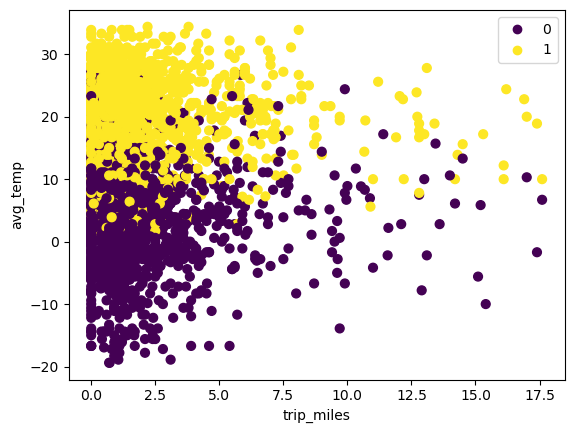


{0: 2410981, 1: 2911243, 2: 3485258}
   trip_miles   avg_temp  start_latitude  end_latitude  start_longitude  \
0    2.152015  12.952843       41.900492     41.902470       -87.640119   
1    1.914715  11.028992       41.893736     41.895242       -87.636539   
2    1.871262  12.284758       41.892345     41.893525       -87.635822   

   end_longitude    dur_min  trip_total        xh        yh        xm  \
0     -87.645047   9.856096   11.466123  0.395026  0.578924  0.508644   
1     -87.641249  10.492318   10.890660  0.361893  0.402413  0.514680   
2     -87.640067  10.050570   10.652773  0.374958  0.340659  0.508020   

         ym        xw        yw        xd        yd  
0  0.466059  0.094130  0.610644  0.511081  0.486687  
1  0.484865  0.495735  0.049516  0.509685  0.479130  
2  0.484559  0.830450  0.694692  0.509240  0.474890  


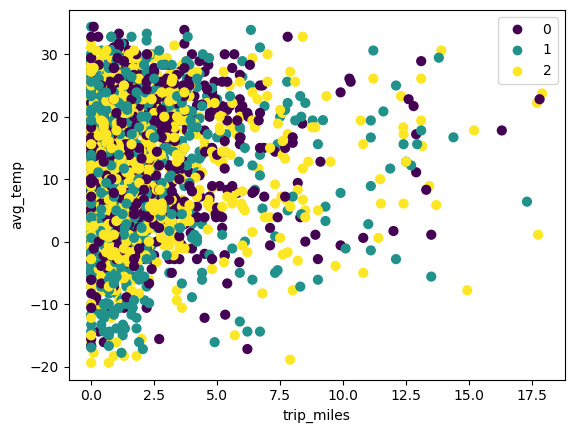


{0: 2479182, 1: 2185624, 2: 1997715, 3: 2144961}
   trip_miles   avg_temp  start_latitude  end_latitude  start_longitude  \
0    2.055962  20.823599       41.896594     41.898113       -87.637518   
1    1.921138  18.538035       41.892375     41.893548       -87.635581   
2    2.017291   4.560947       41.898065     41.899864       -87.639478   
3    1.845874   2.272836       41.893135     41.894695       -87.636513   

   end_longitude    dur_min  trip_total        xh        yh        xm  \
0     -87.642417  10.613752   11.326601  0.354991  0.492101  0.324196   
1     -87.640083  10.233307   10.851649  0.364874  0.363488  0.359244   
2     -87.643921   9.492800   10.949583  0.416100  0.473742  0.698584   
3     -87.640955  10.112716   10.632830  0.374895  0.370363  0.704616   

         ym        xw        yw        xd        yd  
0  0.232476  0.277023  0.260749  0.487207  0.480784  
1  0.290798  0.822831  0.718286  0.489993  0.479749  
2  0.735848  0.331131  0.753713  0.524561  0.4

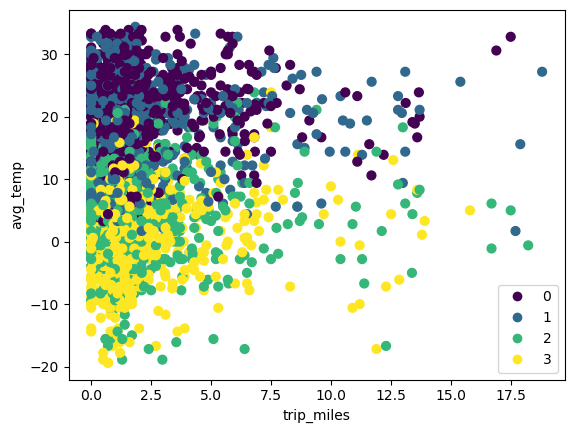


{0: 1630142, 1: 2164719, 2: 1773841, 3: 1649913, 4: 1588867}
   trip_miles   avg_temp  start_latitude  end_latitude  start_longitude  \
0    1.884413   9.017273       41.892607     41.893661       -87.636038   
1    1.923135   1.446991       41.896563     41.899012       -87.638247   
2    1.936343  12.795882       41.892936     41.893822       -87.636194   
3    2.147215  22.242525       41.900701     41.904947       -87.640636   
4    1.934113  18.199617       41.891923     41.890460       -87.634729   

   end_longitude    dur_min  trip_total        xh        yh        xm  \
0     -87.640282   9.845816   10.640989  0.380405  0.327642  0.279990   
1     -87.642959   9.953823   10.840081  0.351387  0.477865  0.756184   
2     -87.640553  10.108167   10.825075  0.384747  0.335508  0.792428   
3     -87.646069   9.916405   11.545642  0.312568  0.798582  0.311085   
4     -87.638867  10.980646   10.961854  0.461815  0.172742  0.304265   

         ym        xw        yw        xd       

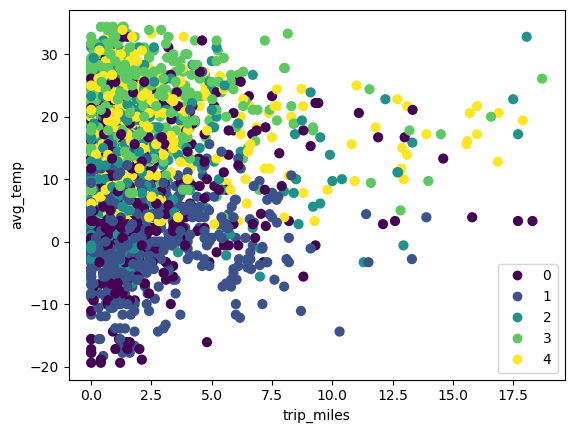

In [51]:
sub_data_sample1 = work_data.loc[:,("trip_miles","start_latitude"
                ,"end_latitude","start_longitude",
                "end_longitude","dur_min","avg_temp",
                       "trip_total","xh","yh" ,"xm" ,"ym" ,"xw" ,
                       "yw","weekday","hour","month","day","xd","yd")]
sub_data_sample1 = sub_data_sample1[(np.abs(stats.zscore(sub_data_sample1)) < 3).all(axis=1)]
sub_data_sample = sub_data_sample1.loc[:,("trip_miles","avg_temp","start_latitude"
                ,"end_latitude","start_longitude",
                "end_longitude","dur_min",
                       "trip_total","xh","yh" ,"xm" ,"ym" ,"xw" ,
                       "yw","xd","yd")]
for i in range(2,6):
    centers,X2,X  = plot_kmeans(i, sub_data_sample, outlier=False)
    print()

{0: 2137654, 1: 7862346}
   trip_miles  start_latitude  end_latitude  start_longitude  end_longitude  \
0   10.025095       41.918179     41.913732       -87.738093     -87.711808   
1    1.509594       41.892825     41.895324       -87.633344     -87.636580   

     dur_min   avg_temp  trip_total        xh        yh        xm        ym  \
0  29.062323  12.289482   35.764840  0.410291  0.406596  0.501956  0.467249   
1   8.984489  12.056851    9.635575  0.368723  0.422973  0.510328  0.480281   

         xw        yw        xd        yd  
0  0.527715  0.484744  0.508592  0.479245  
1  0.520903  0.456673  0.510047  0.479230  


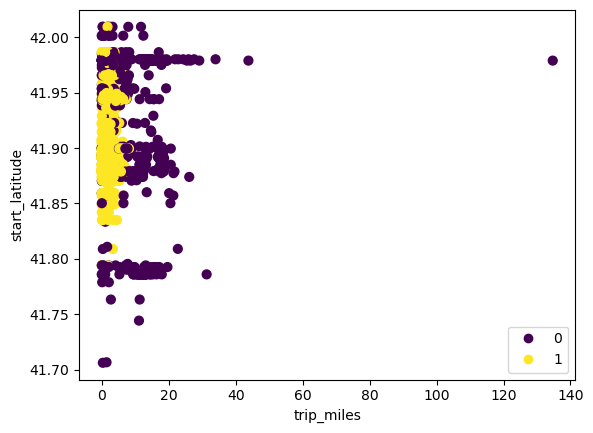


{0: 1489420, 1: 3407232, 2: 5103348}
   trip_miles  start_latitude  end_latitude  start_longitude  end_longitude  \
0   12.508681       41.917574     41.910952       -87.771821     -87.731434   
1    2.805798       41.904753     41.909960       -87.644236     -87.650954   
2    0.973777       41.888010     41.888372       -87.629317     -87.630506   

     dur_min   avg_temp  trip_total        xh        yh        xm        ym  \
0  34.473485  12.355500   43.674988  0.406487  0.374438  0.496012  0.464714   
1  12.672361  12.580216   13.318170  0.378867  0.511019  0.513901  0.468266   
2   7.414741  11.703246    8.109869  0.368220  0.369205  0.508531  0.487701   

         xw        yw        xd        yd  
0  0.547721  0.491752  0.507675  0.477613  
1  0.459902  0.467822  0.510576  0.481737  
2  0.558245  0.450475  0.509764  0.477977  


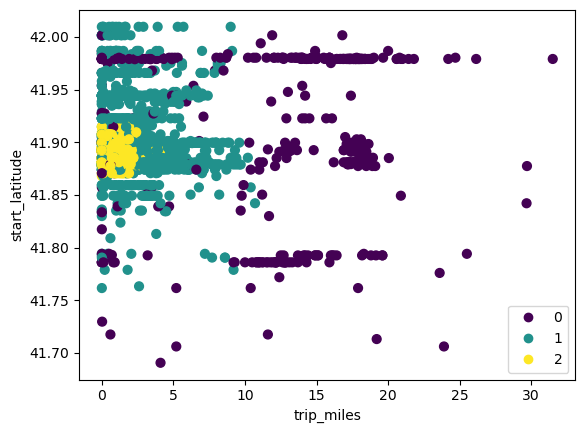

In [53]:
sub_data_sample1 = work_data.loc[:,("trip_miles","start_latitude"
                ,"end_latitude","start_longitude",
                "end_longitude","dur_min","avg_temp",
                       "trip_total","xh","yh" ,"xm" ,"ym" ,"xw" ,
                       "yw","weekday","hour","month","day","xd","yd")]
sub_data_sample = sub_data_sample1.loc[:,("trip_miles","start_latitude"
                ,"end_latitude","start_longitude",
                "end_longitude","dur_min","avg_temp",
                       "trip_total","xh","yh" ,"xm" ,"ym" ,"xw" ,
                       "yw","xd","yd")]
for i in range(2,4):
    centers,X2,X  = plot_gmm(i, sub_data_sample, outlier=False)
    print()